In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as mpl

from datetime import datetime
from datetime import timedelta

In [2]:
df = pd.read_csv('C:/ProgramData/ETH/TrainingData/training.csv')
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,738.615957,1609459200,738.615957,736.212707,736.212707,9.191832,6776.937020,737.278171
1,733.205047,1609459500,736.074300,733.205047,736.074300,75.298761,55315.534764,734.614140
2,730.580620,1609459800,733.400000,730.298975,733.195132,34.835544,25493.189969,731.815460
3,731.879341,1609460100,731.917669,731.282995,731.282995,5.355168,3917.951300,731.620666
4,731.563416,1609460400,731.563416,729.518833,731.371327,5.322368,3886.713436,730.260155


In [3]:
df['datetime'] = pd.to_datetime(df.date,unit='s')
df.set_index('datetime', inplace=True)
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
datetime,,,,,,,,
2021-01-01 00:00:00,738.615957,1609459200,738.615957,736.212707,736.212707,9.191832,6776.937020,737.278171
2021-01-01 00:05:00,733.205047,1609459500,736.074300,733.205047,736.074300,75.298761,55315.534764,734.614140
2021-01-01 00:10:00,730.580620,1609459800,733.400000,730.298975,733.195132,34.835544,25493.189969,731.815460
2021-01-01 00:15:00,731.879341,1609460100,731.917669,731.282995,731.282995,5.355168,3917.951300,731.620666
2021-01-01 00:20:00,731.563416,1609460400,731.563416,729.518833,731.371327,5.322368,3886.713436,730.260155


In [4]:
df['ds'] = df.index
df['y'] = df['close']
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ds,y
datetime,,,,,,,,,,
2021-01-01 00:00:00,738.615957,1609459200,738.615957,736.212707,736.212707,9.191832,6776.937020,737.278171,2021-01-01 00:00:00,738.615957
2021-01-01 00:05:00,733.205047,1609459500,736.074300,733.205047,736.074300,75.298761,55315.534764,734.614140,2021-01-01 00:05:00,733.205047
2021-01-01 00:10:00,730.580620,1609459800,733.400000,730.298975,733.195132,34.835544,25493.189969,731.815460,2021-01-01 00:10:00,730.580620
2021-01-01 00:15:00,731.879341,1609460100,731.917669,731.282995,731.282995,5.355168,3917.951300,731.620666,2021-01-01 00:15:00,731.879341
2021-01-01 00:20:00,731.563416,1609460400,731.563416,729.518833,731.371327,5.322368,3886.713436,730.260155,2021-01-01 00:20:00,731.563416


In [5]:
forecast_data = df[['ds', 'y']].copy()
forecast_data.reset_index(inplace=True)
forecast_data.head()

,datetime,ds,y
0,2021-01-01 00:00:00,2021-01-01 00:00:00,738.615957
1,2021-01-01 00:05:00,2021-01-01 00:05:00,733.205047
2,2021-01-01 00:10:00,2021-01-01 00:10:00,730.580620
3,2021-01-01 00:15:00,2021-01-01 00:15:00,731.879341
4,2021-01-01 00:20:00,2021-01-01 00:20:00,731.563416


In [6]:
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29418 entries, 0 to 29417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  29418 non-null  datetime64[ns]
 1   ds        29418 non-null  datetime64[ns]
 2   y         29418 non-null  float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 689.6 KB


In [7]:
#all records up to -5000 from last
train_data = forecast_data.iloc[:len(forecast_data)-5000]
#last 5000 records
test_data = forecast_data.iloc[len(forecast_data)-5000:]

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24418 entries, 0 to 24417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  24418 non-null  datetime64[ns]
 1   ds        24418 non-null  datetime64[ns]
 2   y         24418 non-null  float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 572.4 KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 24418 to 29417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5000 non-null   datetime64[ns]
 1   ds        5000 non-null   datetime64[ns]
 2   y         5000 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 117.3 KB


In [10]:
m = Prophet()
m.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [43]:
future = m.make_future_dataframe(periods=500,freq='5min')
forecast = m.predict(future)

In [44]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24870 entries, 0 to 24869
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          24870 non-null  datetime64[ns]
 1   trend                       24870 non-null  float64       
 2   yhat_lower                  24870 non-null  float64       
 3   yhat_upper                  24870 non-null  float64       
 4   trend_lower                 24870 non-null  float64       
 5   trend_upper                 24870 non-null  float64       
 6   additive_terms              24870 non-null  float64       
 7   additive_terms_lower        24870 non-null  float64       
 8   additive_terms_upper        24870 non-null  float64       
 9   daily                       24870 non-null  float64       
 10  daily_lower                 24870 non-null  float64       
 11  daily_upper                 24870 non-null  float64   

In [45]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:00:00,664.864214,593.054270,724.087151,664.864214,664.864214,-7.480505,-7.480505,-7.480505,3.914138,3.914138,3.914138,-11.394643,-11.394643,-11.394643,0.0,0.0,0.0,657.383709
1,2021-01-01 00:05:00,665.139444,593.562054,726.477776,665.139444,665.139444,-7.473517,-7.473517,-7.473517,3.941081,3.941081,3.941081,-11.414598,-11.414598,-11.414598,0.0,0.0,0.0,657.665927
2,2021-01-01 00:10:00,665.414674,588.187349,725.277322,665.414674,665.414674,-7.478262,-7.478262,-7.478262,3.955817,3.955817,3.955817,-11.434079,-11.434079,-11.434079,0.0,0.0,0.0,657.936412
3,2021-01-01 00:15:00,665.689904,595.544725,731.224092,665.689904,665.689904,-7.495109,-7.495109,-7.495109,3.957973,3.957973,3.957973,-11.453082,-11.453082,-11.453082,0.0,0.0,0.0,658.194795
4,2021-01-01 00:20:00,665.965134,594.980069,720.935446,665.965134,665.965134,-7.524362,-7.524362,-7.524362,3.947240,3.947240,3.947240,-11.471602,-11.471602,-11.471602,0.0,0.0,0.0,658.440772


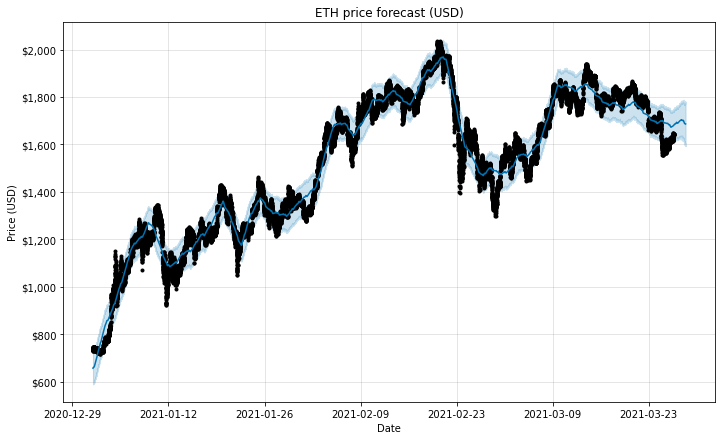

In [46]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price (USD)');

plt.title('ETH price forecast (USD)')
fig.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

In [47]:
test_data.head()

,datetime,ds,y
24418,2021-03-26 14:50:00,2021-03-26 14:50:00,1643.964145
24419,2021-03-26 14:55:00,2021-03-26 14:55:00,1644.860240
24420,2021-03-26 15:00:00,2021-03-26 15:00:00,1642.983469
24421,2021-03-26 15:05:00,2021-03-26 15:05:00,1640.626283
24422,2021-03-26 15:10:00,2021-03-26 15:10:00,1642.273275


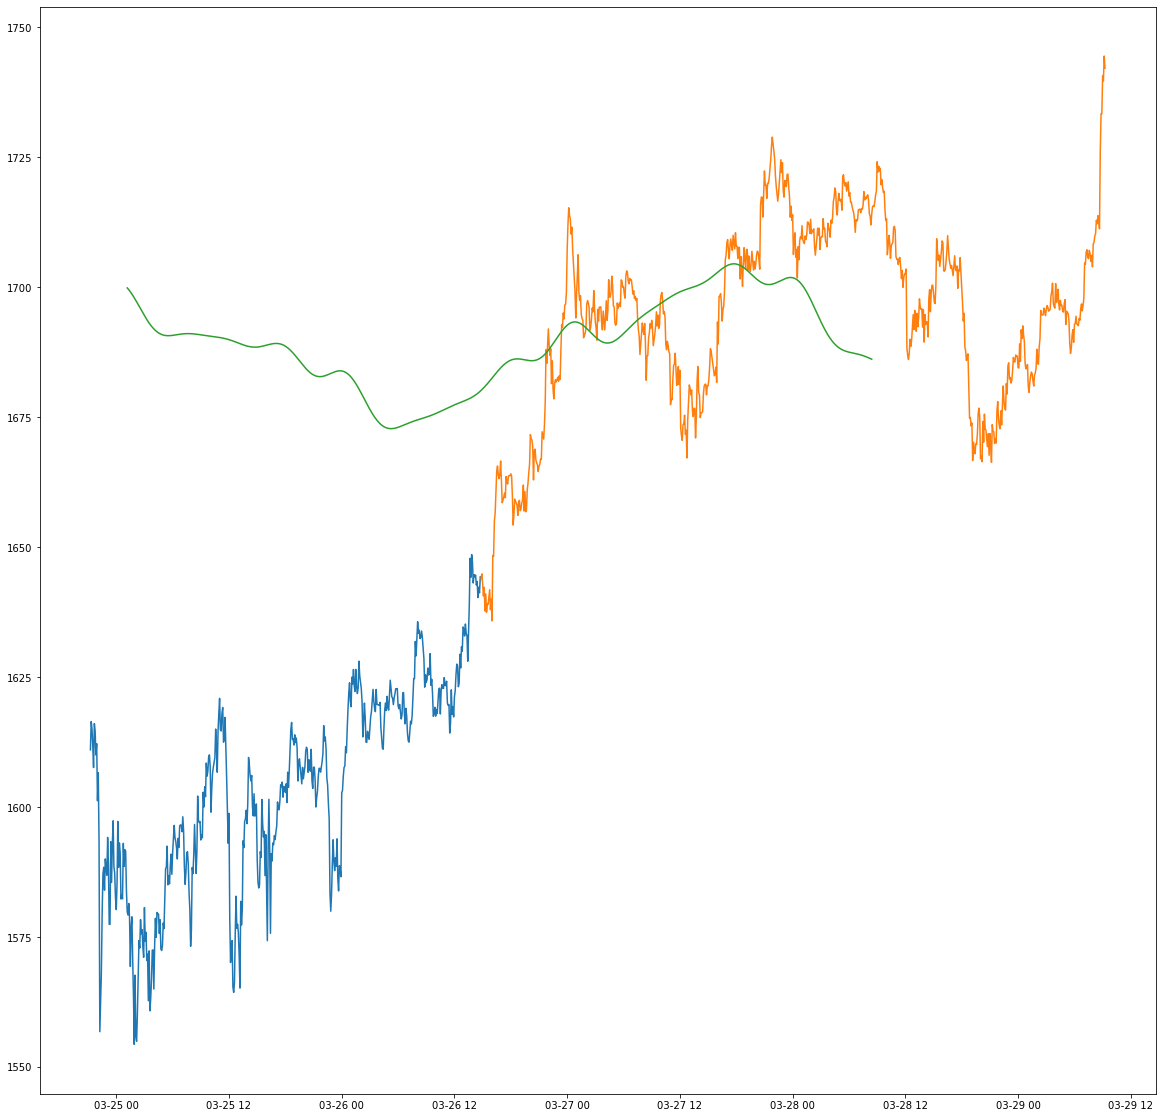

In [53]:
plt.figure(figsize=(20,20))
plt.plot(train_data[['ds']].iloc[len(train_data)-500:], train_data[['y']].iloc[len(train_data)-500:])
plt.plot(test_data[['ds']][:800], test_data[['y']][:800])
plt.plot(forecast[['ds']].iloc[len(train_data)-500:], forecast[['yhat']].iloc[len(train_data)-500:])


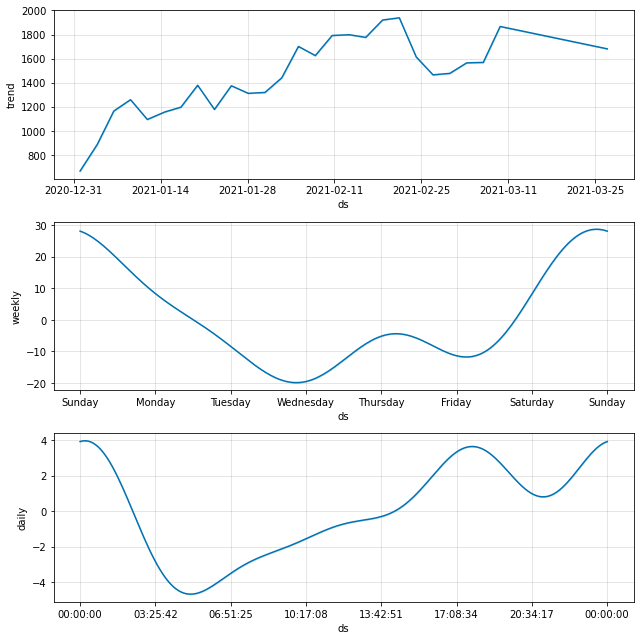

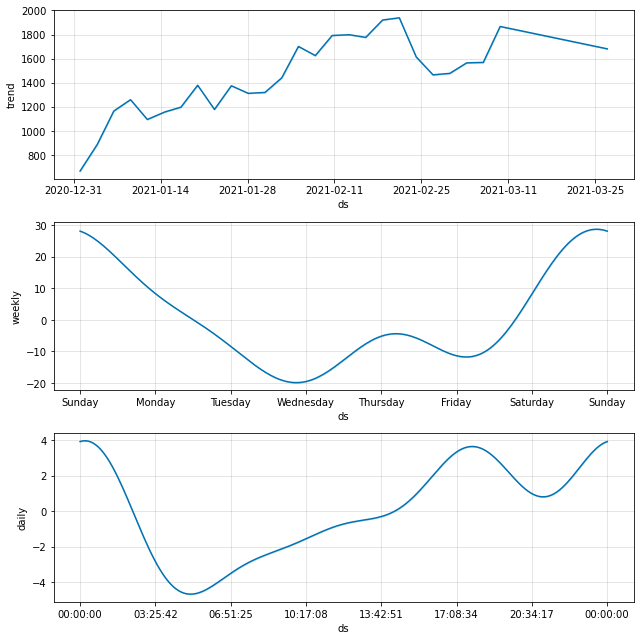

In [31]:
start_date =  datetime.now()
end_date = start_date + timedelta(hours=10)

forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)].head()[['ds','yhat']]
m.plot_components(forecast)